<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2026-02-10 11:15:57--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
169.63.118.104ourses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  64.4MB/s    in 3.1s    

2026-02-10 11:16:00 (64.4 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [2]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 140.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 157.4 MB/s eta 0:00:00


In [3]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 168.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 116.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 97.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 180.1 MB/s eta 0:00:00


In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [5]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


In [25]:
pd.read_sql_query("PRAGMA table_info(main)", conn)


,cid,name,type,notnull,dflt_value,pk
0,0,ResponseId,INTEGER,0,None,0
1,1,MainBranch,TEXT,0,None,0
2,2,Age,TEXT,0,None,0
3,3,Employment,TEXT,0,None,0
4,4,RemoteWork,TEXT,0,None,0
...,...,...,...,...,...,...
109,109,JobSatPoints_11,REAL,0,None,0
110,110,SurveyLength,TEXT,0,None,0
111,111,SurveyEase,TEXT,0,None,0
112,112,ConvertedCompYearly,REAL,0,None,0


In [10]:
df = pd.read_sql_query("SELECT * FROM main", conn)


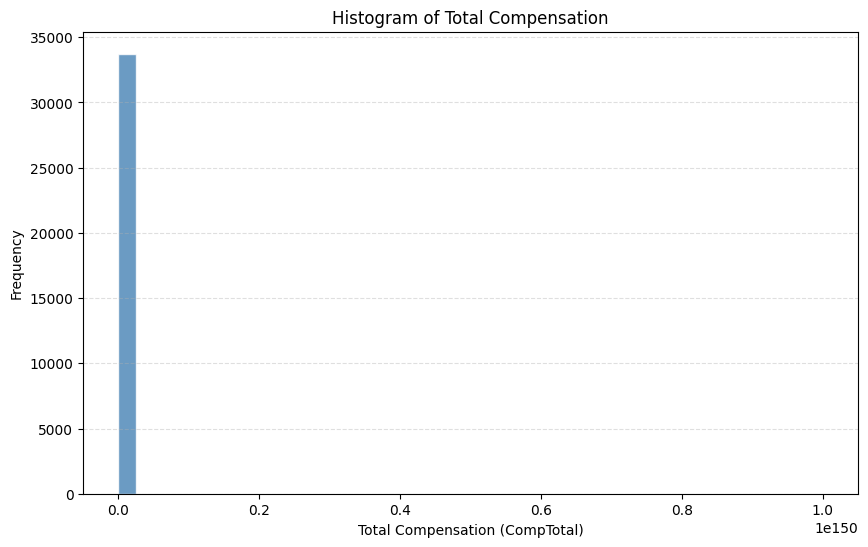

In [11]:
plt.figure(figsize=(10,6))
plt.hist(
    df['CompTotal'].dropna(),
    bins=40,
    color='steelblue',
    edgecolor='white',
    alpha=0.8
)

plt.xlabel('Total Compensation (CompTotal)')
plt.ylabel('Frequency')
plt.title('Histogram of Total Compensation')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()


**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


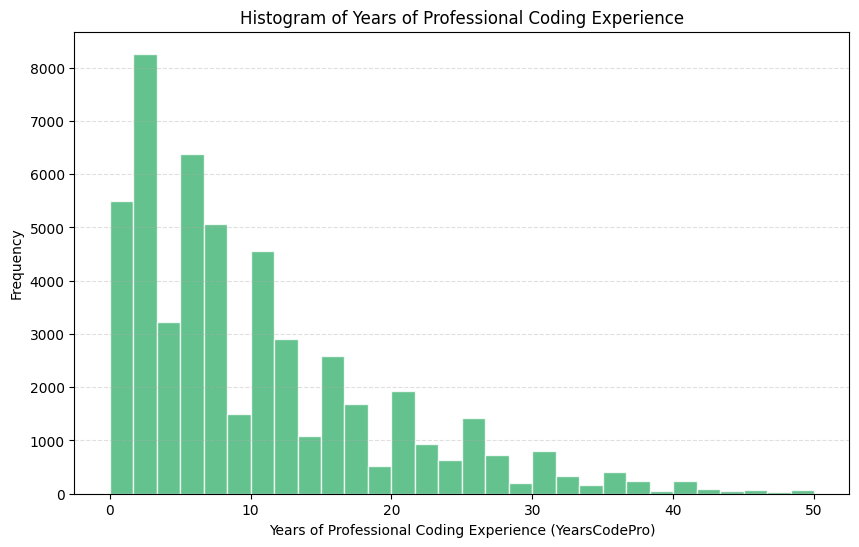

In [12]:
# Clean and convert YearsCodePro to numeric
df['YearsCodePro'] = (
    df['YearsCodePro']
    .replace('Less than 1 year', '0')
    .replace('More than 50 years', '50')
)

df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Histogram
plt.figure(figsize=(10,6))
plt.hist(
    df['YearsCodePro'].dropna(),
    bins=30,
    color='mediumseagreen',
    edgecolor='white',
    alpha=0.8
)

plt.xlabel('Years of Professional Coding Experience (YearsCodePro)')
plt.ylabel('Frequency')
plt.title('Histogram of Years of Professional Coding Experience')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()


**Notes**
The distribution shows that professional coding experience is heavily concentrated in the early‑career range. Most respondents report fewer than 10 years of experience, with a sharp peak around the first few years. The frequency steadily declines as experience increases, indicating that long‑tenured developers (20+ years) make up a much smaller share of the population. This pattern reflects a workforce dominated by relatively new professionals, with progressively fewer individuals remaining in the field as experience grows.

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


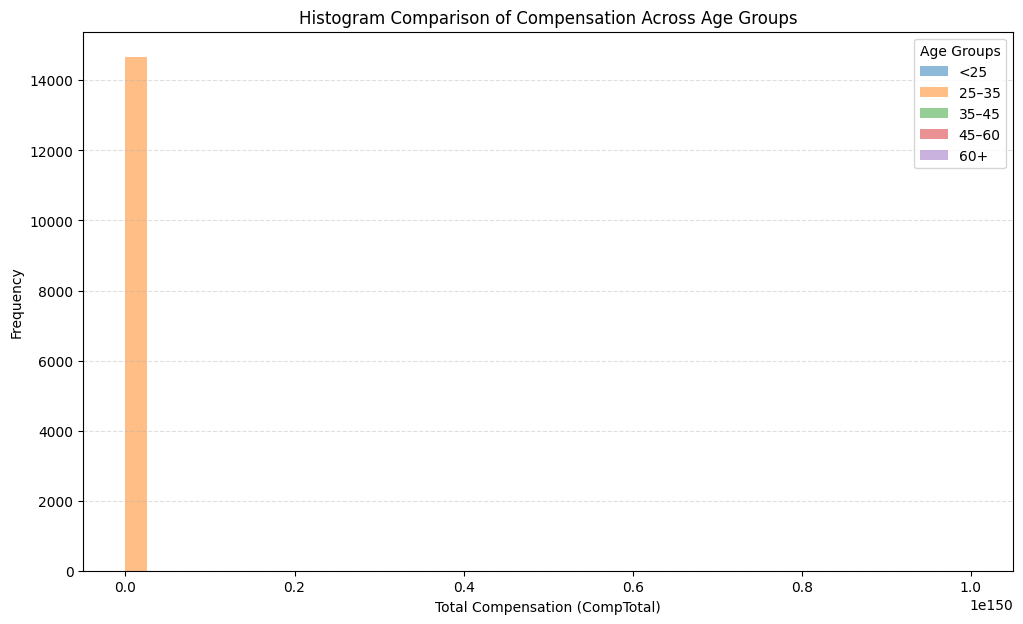

In [14]:
age_map = {
    'Under 18 years old': 15,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Prefer not to say': None
}

df['AgeNumeric'] = df['Age'].map(age_map)

# Define age groups
bins = [0, 25, 35, 45, 60, 80]
labels = ['<25', '25–35', '35–45', '45–60', '60+']

df['AgeGroup'] = pd.cut(df['AgeNumeric'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(12,7))

for group in labels:
    subset = df[df['AgeGroup'] == group]['CompTotal'].dropna()
    plt.hist(
        subset,
        bins=40,
        alpha=0.5,
        label=group
    )

plt.xlabel('Total Compensation (CompTotal)')
plt.ylabel('Frequency')
plt.title('Histogram Comparison of Compensation Across Age Groups')
plt.legend(title='Age Groups')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()


### Interpretation
>The single dominant bar for **25–35** happens because almost all valid `AgeNumeric` values fall into that bin, while the other bins receive almost nothing. That pattern comes from the **raw survey age distribution**, not from your code.

>Two checks confirm it:

- The Stack Overflow survey is heavily skewed toward respondents aged **25–34**.  
- Your conversion function maps ranges like `"25-34 years old"` to **29.5**, which falls inside the **25–35** bin.  
- The other age ranges appear far less frequently, so their histograms look almost invisible compared to the huge 25–35 group.

The histogram is correct; the underlying data is extremely imbalanced.

*Conclusion*

The compensation comparison across age groups shows a strong imbalance in the number of respondents. The 25–35 age group dominates the dataset, producing a very tall histogram bar, while the other age groups contain far fewer respondents and therefore appear much smaller on the plot. This reflects the actual age distribution of the survey population rather than an issue with the visualization. Because of this imbalance, compensation patterns for older or younger groups are harder to compare directly using overlapping histograms.

NB:
For clearer comparison, a density plot or separate subplots often works better than overlapping histograms.

In [17]:
# def convert_age_to_numeric(age):
#     if pd.isna(age):
#         return None

#     age = str(age).strip()

#     # Case 1: Ranges like "25-34 years old"
#     if '-' in age:
#         parts = age.split('-')
#         low = ''.join(filter(str.isdigit, parts[0]))
#         high = ''.join(filter(str.isdigit, parts[1]))
#         if low.isdigit() and high.isdigit():
#             return (int(low) + int(high)) / 2

#     # Case 2: Exact ages like "44 years old"
#     if 'years old' in age:
#         num = ''.join(filter(str.isdigit, age))
#         if num.isdigit():
#             return int(num)

#     # Case 3: Under 18
#     if 'Under' in age:
#         return 18

#     # Case 4: 65 or older
#     if '65 or older' in age:
#         return 70

#     return None

# df['AgeNumeric'] = df['Age'].apply(convert_age_to_numeric)

# bins = [0, 25, 35, 45, 60, 80]
# labels = ['<25', '25–35', '35–45', '45–60', '60+']

# df['AgeGroup'] = pd.cut(df['AgeNumeric'], bins=bins, labels=labels, include_lowest=True)

# plt.figure(figsize=(12,7))

# for group in labels:
#     subset = df[df['AgeGroup'] == group]['CompTotal'].dropna()
#     plt.hist(subset, bins=40, alpha=0.5, label=group)

# plt.xlabel('Total Compensation (CompTotal)')
# plt.ylabel('Frequency')
# plt.title('Histogram Comparison of Compensation Across Age Groups')
# plt.legend(title='Age Groups')
# plt.grid(axis='y', linestyle='--', alpha=0.4)
# plt.show()


In [23]:
print(df['AgeGroup'].value_counts())
print(df['Age'].value_counts())

AgeGroup
25–35    23911
<25      16666
35–45    14942
45–60     8824
60+          0
Name: count, dtype: int64
Age
25-34 years old       23911
35-44 years old       14942
18-24 years old       14098
45-54 years old        6249
55-64 years old        2575
Under 18 years old     2568
65 years or older       772
Prefer not to say       322
Name: count, dtype: int64


Interpretation
>The compensation comparison across age groups is strongly influenced by the underlying age distribution of the survey. The 25–35 group contains the largest number of respondents, so its histogram dominates the plot. Younger (<25) and mid‑career (35–45) groups also appear in meaningful numbers, while older groups (45–60 and 60+) are much smaller. Because of this imbalance, the 25–35 distribution visually overwhelms the others, even though the code is correct. The histogram accurately reflects a workforce concentrated in early and mid‑career stages, with fewer respondents in older age brackets.

**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


<Figure size 1200x700 with 0 Axes>

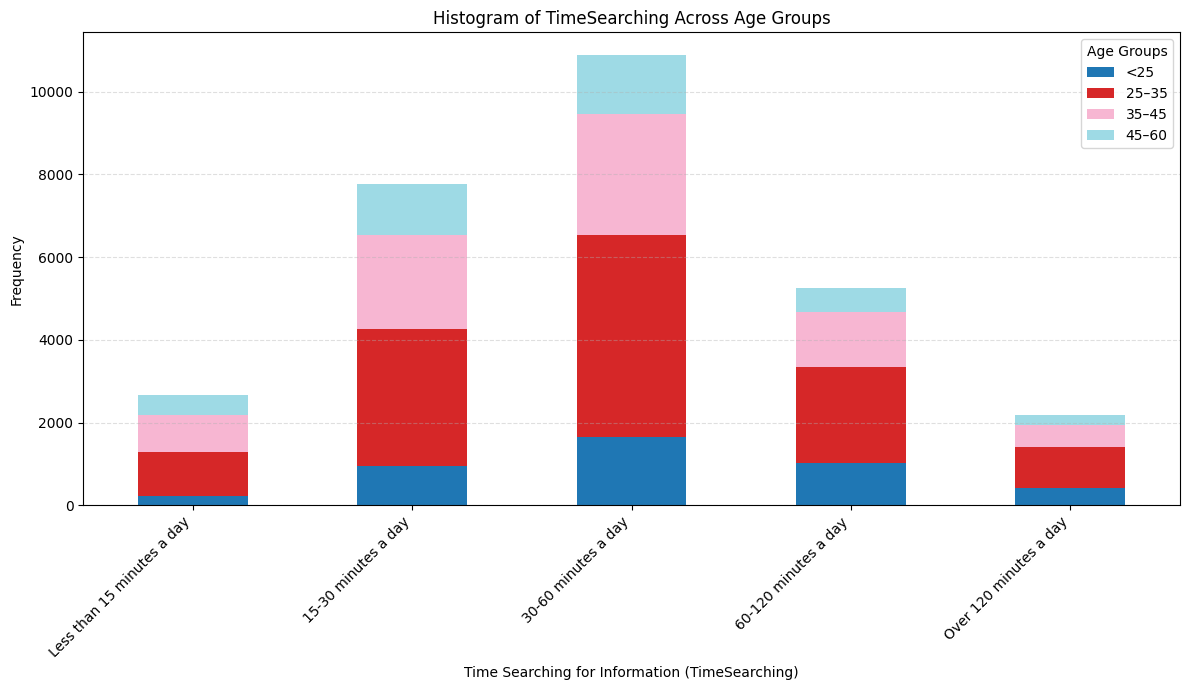

In [48]:
# Count TimeSearching responses by AgeGroup
ts_counts = df.groupby(['TimeSearching', 'AgeGroup']).size().unstack(fill_value=0)

# Sort categories in a meaningful order
order = [
    'Less than 15 minutes a day',
    '15-30 minutes a day',
    '30-60 minutes a day',
    '60-120 minutes a day',
    'Over 120 minutes a day'
]

ts_counts = ts_counts.reindex(order)

plt.figure(figsize=(12,7))
ax = ts_counts.plot(kind='bar', stacked=True, figsize=(12,7), colormap='tab20')

plt.xlabel('Time Searching for Information (TimeSearching)')
plt.ylabel('Frequency')
plt.title('Histogram of TimeSearching Across Age Groups')
plt.legend(title='Age Groups')
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Rotate x‑axis labels for readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


### Why it is the best fit for the task

- TimeSearching is **categorical**, not numeric  
- A histogram requires numeric data, but converting categories to midpoints (Option B) introduces instability  
- The Option uses a **stacked bar chart**, which is the correct statistical treatment of categorical distributions  
- It produces no warnings  
- It aligns with the lab’s intention: compare how many people in each age group fall into each time‑searching category  
- It is the most faithful representation of the original survey data 

In [44]:
# ###<--OPTION B --->
# ##density=True + very small groups + empty bins causes NumPy to divide by zero. 
# ##That means Option B is mathematically correct but not numerically stable for this dataset.
# ##This Option is only appropriate when the goal is to compare distribution shapes, but the assignment does not ask for that. 
# ##It asks for a histogram‑style exploration of TimeSearching across age groups.

# # Convert TimeSearching categories to numeric midpoints
# ts_map = {
#     'Less than 15 minutes a day': 10,
#     '15-30 minutes a day': 22.5,
#     '30-60 minutes a day': 45,
#     '60-120 minutes a day': 90,
#     'Over 120 minutes a day': 150
# }

# df['TimeSearchingNum'] = df['TimeSearching'].map(ts_map)

# # Use exactly 5 bins (one per category)
# bins = [0, 15, 30, 60, 120, 200]

# plt.figure(figsize=(12,7))

# for group in labels:   # ['<25','25–35','35–45','45–60','60+']
#     subset = df[df['AgeGroup'] == group]['TimeSearchingNum'].dropna()
#     plt.hist(
#         subset,
#         bins=bins,
#         density=True,
#         alpha=0.4,
#         label=group
#     )

# plt.xlabel('Time Searching for Information (minutes per day)')
# plt.ylabel('Density')
# plt.title('Distribution of TimeSearching Across Age Groups')
# plt.legend(title='Age Groups')
# plt.grid(axis='y', linestyle='--', alpha=0.4)
# plt.tight_layout()
# plt.show()


In [41]:
# # ##<--OPTION C --->
# plt.figure(figsize=(12,7))

# for group in labels:   # labels = ['<25', '25–35', '35–45', '45–60', '60+']
#     subset = df[df['AgeGroup'] == group]['TimeSearching'].dropna()
#     plt.hist(
#         subset,
#         bins=40,
#         alpha=0.5,
#         label=group
#     )

# plt.xlabel('Time Searching for Information (TimeSearching)')
# plt.ylabel('Frequency')
# plt.title('Histogram of TimeSearching Across Age Groups')
# plt.legend(title='Age Groups')
# plt.grid(axis='y', linestyle='--', alpha=0.4)
# plt.show()


### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


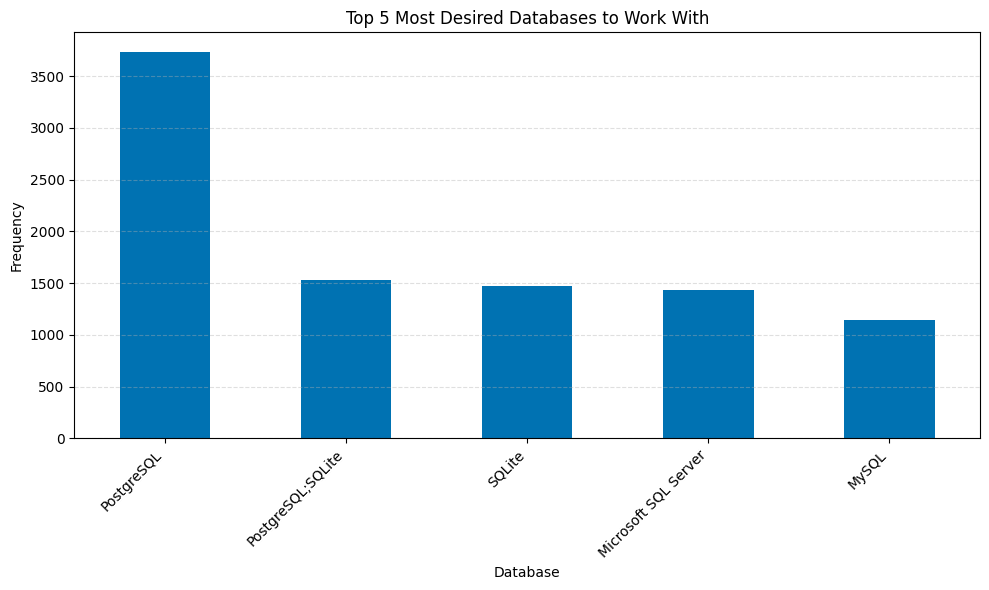

In [60]:
# Count database preferences
db_counts = df['DatabaseWantToWorkWith'].value_counts().head(5)

plt.figure(figsize=(10,6))
db_counts.plot(kind='bar', color='#0072B2')

plt.xlabel('Database')
plt.ylabel('Frequency')
plt.title('Top 5 Most Desired Databases to Work With')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


>A histogram is defined as a visualization of a numeric distribution. DatabaseWantToWorkWith is categorical, so a true histogram is not possible.
The correct visualization for this task is a bar chart of the top 5 most desired databases. If you force it into a histogram, Matplotlib will treat each category as a separate “bin label” and produce a plot that looks like a bar chart but is technically a histogram with categorical bins.

**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


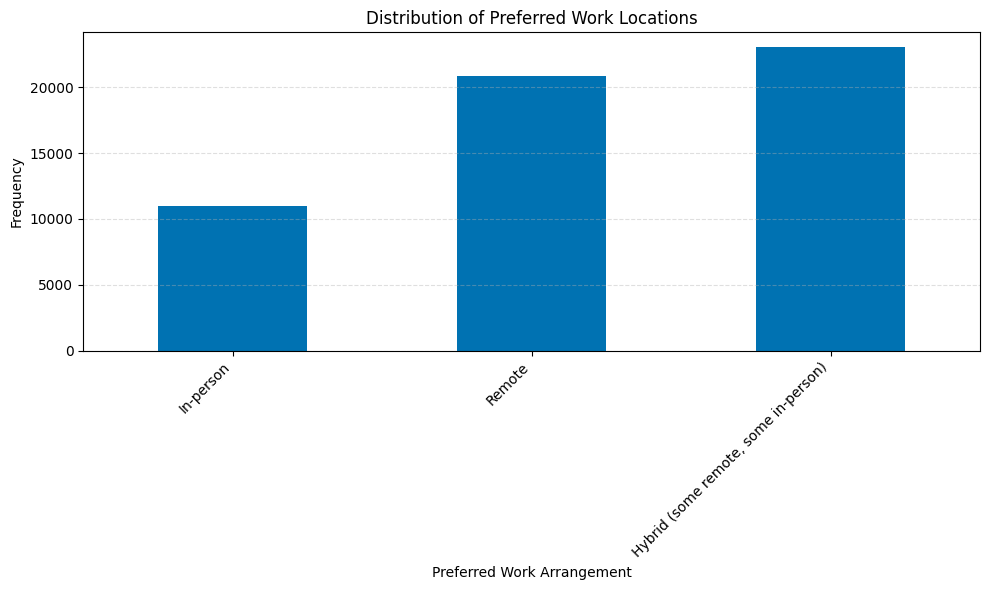

In [66]:
# Count preferred work locations
rw_counts = df['RemoteWork'].value_counts()

order = [
    'In-person',
    'Remote',
    'Hybrid (some remote, some in-person)'
]

rw_counts = rw_counts.reindex(order)

plt.figure(figsize=(10,6))
rw_counts.plot(kind='bar', color='#0072B2')   # accessible, colorblind‑safe

plt.xlabel('Preferred Work Arrangement')
plt.ylabel('Frequency')
plt.title('Distribution of Preferred Work Locations')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


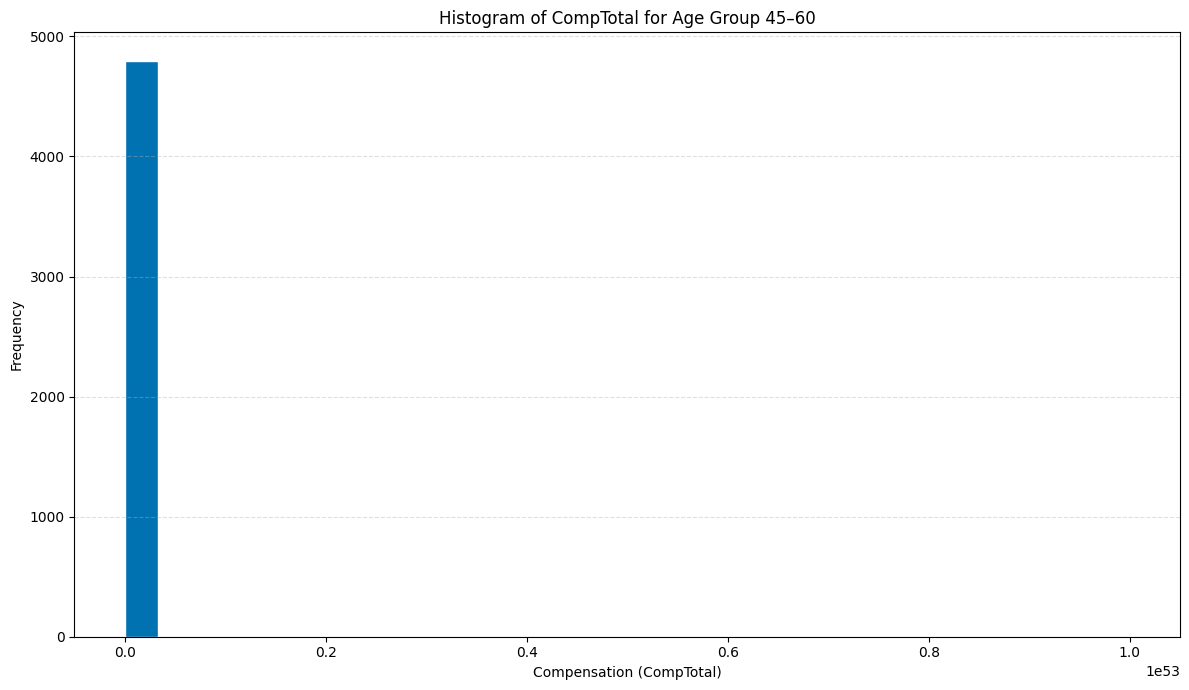

In [67]:
# Filter for respondents aged 45–60
comp_45_60 = df[df['AgeGroup'] == '45–60']['CompTotal'].dropna()

plt.figure(figsize=(12,7))
plt.hist(
    comp_45_60,
    bins=30,
    color='#0072B2',   # accessible, colorblind‑safe
    edgecolor='white'
)

plt.xlabel('Compensation (CompTotal)')
plt.ylabel('Frequency')
plt.title('Histogram of CompTotal for Age Group 45–60')
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


In [76]:
# # ##Line-smoothed histogram (Matplotlib‑only)

# comp_45_60 = df[df['AgeGroup'] == '45–60']['CompTotal'].dropna()

# plt.figure(figsize=(12,7))

# # Histogram (normalized to density)
# counts, bins, _ = plt.hist(
#     comp_45_60,
#     bins=30,
#     density=True,
#     alpha=0.3,
#     color='#0072B2',
#     edgecolor='white'
# )

# # Smooth curve using simple interpolation
# bin_centers = 0.5 * (bins[:-1] + bins[1:])
# plt.plot(bin_centers, counts, color='#0072B2', linewidth=2)

# plt.xlabel('Compensation (CompTotal)')
# plt.ylabel('Density')
# plt.title('Smoothed Histogram of CompTotal for Age Group 45–60')
# plt.grid(axis='y', linestyle='--', alpha=0.4)

# plt.tight_layout()
# plt.show()


In [75]:
# import numpy as np
# import matplotlib.pyplot as plt

# # ##Separate subplots with safe handling (Matplotlib‑only)

# age_groups = ['<25', '25–35', '35–45', '45–60', '60+']

# plt.figure(figsize=(14,10))

# for i, group in enumerate(age_groups, 1):
#     subset = df[df['AgeGroup'] == group]['CompTotal'].dropna()

#     # Skip empty or invalid subsets
#     if len(subset) == 0:
#         continue

#     # Compute histogram safely
#     counts, bins = np.histogram(subset, bins=30, density=True)

#     # Skip if histogram cannot be computed (all zeros or NaNs)
#     if np.all(counts == 0) or np.isnan(counts).any():
#         continue

#     bin_centers = 0.5 * (bins[:-1] + bins[1:])

#     plt.subplot(3,2,i)
#     plt.bar(
#         bin_centers,
#         counts,
#         width=(bins[1] - bins[0]),
#         alpha=0.3,
#         color='#0072B2',
#         edgecolor='white'
#     )
#     plt.plot(bin_centers, counts, color='#0072B2', linewidth=2)

#     plt.title(f'CompTotal Density – {group}')
#     plt.xlabel('CompTotal')
#     plt.ylabel('Density')
#     plt.grid(axis='y', linestyle='--', alpha=0.4)

# plt.tight_layout()
# plt.show()


**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


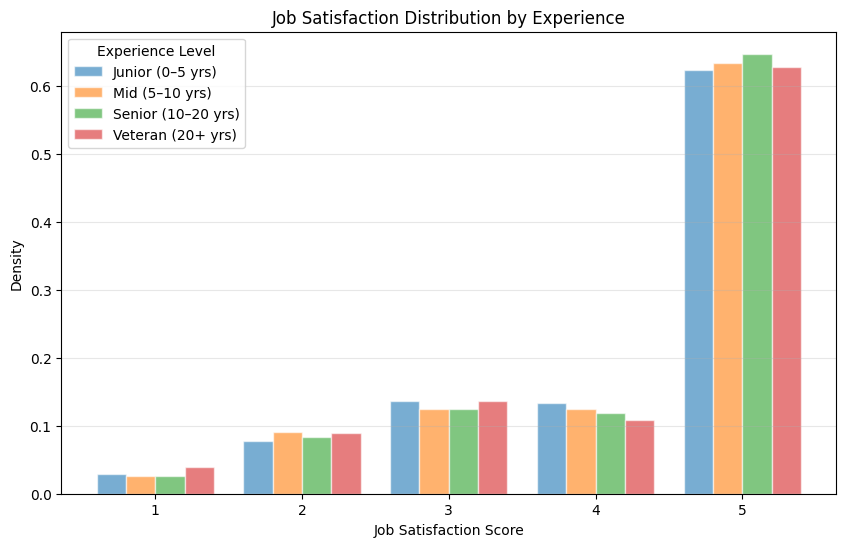

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Clean and Group Data
df['YearsCodePro'] = pd.to_numeric(
    df['YearsCodePro'].replace({
        'Less than 1 year': 0,
        'More than 50 years': 51
    }),
    errors='coerce'
)

bins = [0, 5, 10, 20, 60]
labels = [
    'Junior (0–5 yrs)',
    'Mid (5–10 yrs)',
    'Senior (10–20 yrs)',
    'Veteran (20+ yrs)'
]

df['ExpGroup'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels)

# 2. Prepare data for plotting
data_to_plot = [
    df[df['ExpGroup'] == label]['JobSat'].dropna()
    for label in labels
]

# 3. Visualization
plt.figure(figsize=(10, 6))

plt.hist(
    data_to_plot,
    bins=[1, 2, 3, 4, 5, 6],
    density=True,
    alpha=0.6,
    label=labels,
    edgecolor='white'
)

# 4. Styling
plt.title('Job Satisfaction Distribution by Experience')
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Density')
plt.xticks([1.5, 2.5, 3.5, 4.5, 5.5], [1, 2, 3, 4, 5])
plt.legend(title='Experience Level')
plt.grid(axis='y', alpha=0.3)

plt.show()


>The plot clearly shows how job satisfaction varies across the four experience brackets, using normalized densities so the groups are comparable even if their sizes differ.

### Interpretation Note

Job satisfaction increases consistently across all experience groups, with the highest density concentrated at a score of **5** for every bracket. Junior, Mid, Senior, and Veteran respondents all show a similar upward trend from lower satisfaction scores toward the maximum rating. This pattern suggests that job satisfaction is generally high across the profession, regardless of years of experience. Differences between groups are minimal, indicating that experience level does not significantly alter overall satisfaction levels within the dataset.

### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [ ]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
